# Box plot Towards - Seaborn
- https://towardsdatascience.com/plotting-time-series-boxplots-5a21f2b76cfe
- A time series dataset is a collection of data that are time-indexed and collected over a period of time.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

### Boxplot in Pandas Series

In [2]:
### DatetimeIndex object containing a range of dates:

date_range = pd.date_range(start = "2022-01-01", 
                           end   = "2022-02-28 23:59:00",
                           freq  = "H")

print(type(date_range))
date_range

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-02-28 14:00:00', '2022-02-28 15:00:00',
               '2022-02-28 16:00:00', '2022-02-28 17:00:00',
               '2022-02-28 18:00:00', '2022-02-28 19:00:00',
               '2022-02-28 20:00:00', '2022-02-28 21:00:00',
               '2022-02-28 22:00:00', '2022-02-28 23:00:00'],
              dtype='datetime64[ns]', length=1416, freq='H')

In [3]:
### create a Pandas Series using the date_range variable as the index. value ->random number generator:

ts = pd.Series(list(np.random.randn(len(date_range))),
               index = date_range)

ts.info()
ts

<class 'pandas.core.series.Series'>
DatetimeIndex: 1416 entries, 2022-01-01 00:00:00 to 2022-02-28 23:00:00
Freq: H
Series name: None
Non-Null Count  Dtype  
--------------  -----  
1416 non-null   float64
dtypes: float64(1)
memory usage: 22.1 KB


2022-01-01 00:00:00   -1.958097
2022-01-01 01:00:00    2.470825
2022-01-01 02:00:00    0.695220
2022-01-01 03:00:00   -1.806292
2022-01-01 04:00:00   -1.434121
                         ...   
2022-02-28 19:00:00    0.772325
2022-02-28 20:00:00    0.063450
2022-02-28 21:00:00   -0.420326
2022-02-28 22:00:00   -0.472842
2022-02-28 23:00:00   -0.968463
Freq: H, Length: 1416, dtype: float64

In [4]:
ts.index.dayofyear.value_counts()

1     24
45    24
33    24
34    24
35    24
36    24
37    24
38    24
39    24
40    24
41    24
42    24
43    24
44    24
46    24
31    24
47    24
48    24
49    24
50    24
51    24
52    24
53    24
54    24
55    24
56    24
57    24
58    24
32    24
30    24
2     24
15    24
3     24
4     24
5     24
6     24
7     24
8     24
9     24
10    24
11    24
12    24
13    24
14    24
16    24
29    24
17    24
18    24
19    24
20    24
21    24
22    24
23    24
24    24
25    24
26    24
27    24
28    24
59    24
dtype: int64

<AxesSubplot: >

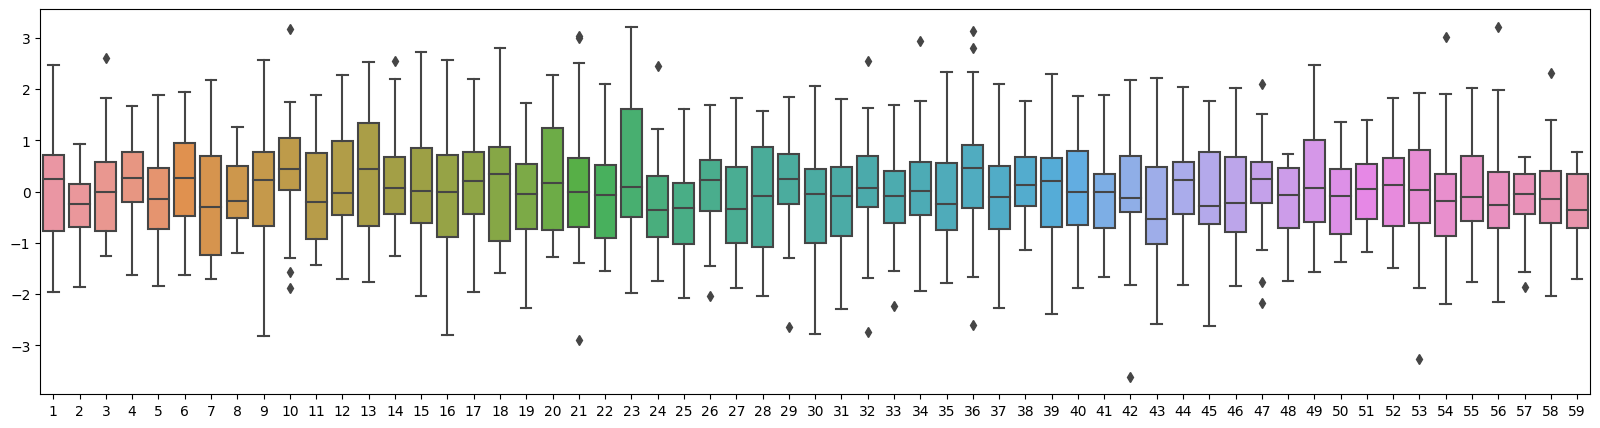

In [5]:
# 1st boxplot

fig, axe = plt.subplots(figsize= (20, 5))
sns.boxplot(x= ts.index.dayofyear, y=ts, ax=axe)

In [6]:
date_range1 = pd.date_range(start = "2022-01-01", 
                           end   = "2022-03-28 23:59:00",
                           freq  = "H")

date_range1.day_of_year

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            87, 87, 87, 87, 87, 87, 87, 87, 87, 87],
           dtype='int64', length=2088)

### Boxplots in Pandas DataFrames

In [7]:
# create a DataFrame with the date_range object set as the index:

df = pd.DataFrame({'temp': np.random.randn(len(date_range))}, index= date_range)
df

,temp
2022-01-01 00:00:00,-0.153241
2022-01-01 01:00:00,0.529265
2022-01-01 02:00:00,0.129228
2022-01-01 03:00:00,2.738001
2022-01-01 04:00:00,0.676130
...,...
2022-02-28 19:00:00,1.024968
2022-02-28 20:00:00,-1.610867
2022-02-28 21:00:00,-0.080101
2022-02-28 22:00:00,-0.156581


<AxesSubplot: ylabel='temp'>

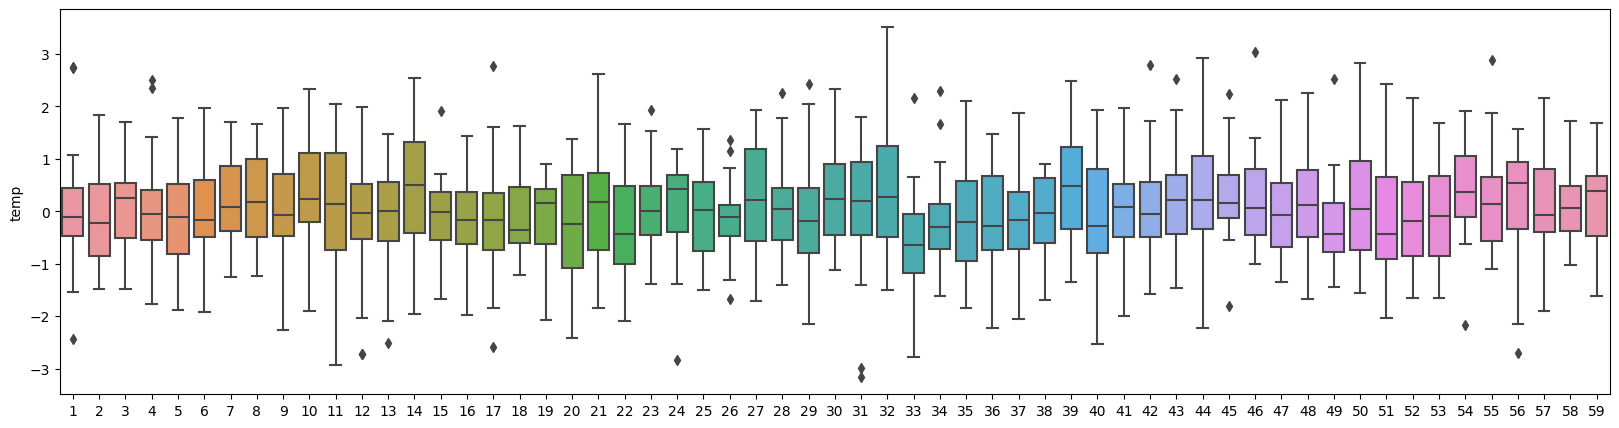

In [8]:
# Same chart as with above Serie

fig, axe = plt.subplots(figsize= (20, 5))
sns.boxplot(x= df.index.dayofyear, y=df['temp'], ax=axe)

In [9]:
# JM - if the DateTimeIndex is not the Index ¿?

df.reset_index(inplace=True)
#df.drop('level_0', axis=1, inplace=True)
df.rename(columns={'index': 'jm_date'}, inplace=True)
df

,jm_date,temp
0,2022-01-01 00:00:00,-0.153241
1,2022-01-01 01:00:00,0.529265
2,2022-01-01 02:00:00,0.129228
3,2022-01-01 03:00:00,2.738001
4,2022-01-01 04:00:00,0.676130
...,...,...
1411,2022-02-28 19:00:00,1.024968
1412,2022-02-28 20:00:00,-1.610867
1413,2022-02-28 21:00:00,-0.080101
1414,2022-02-28 22:00:00,-0.156581


In [12]:
df['jm_date'].dt.dayofweek

0       5
1       5
2       5
3       5
4       5
       ..
1411    0
1412    0
1413    0
1414    0
1415    0
Name: jm_date, Length: 1416, dtype: int64

<AxesSubplot: xlabel='jm_date', ylabel='temp'>

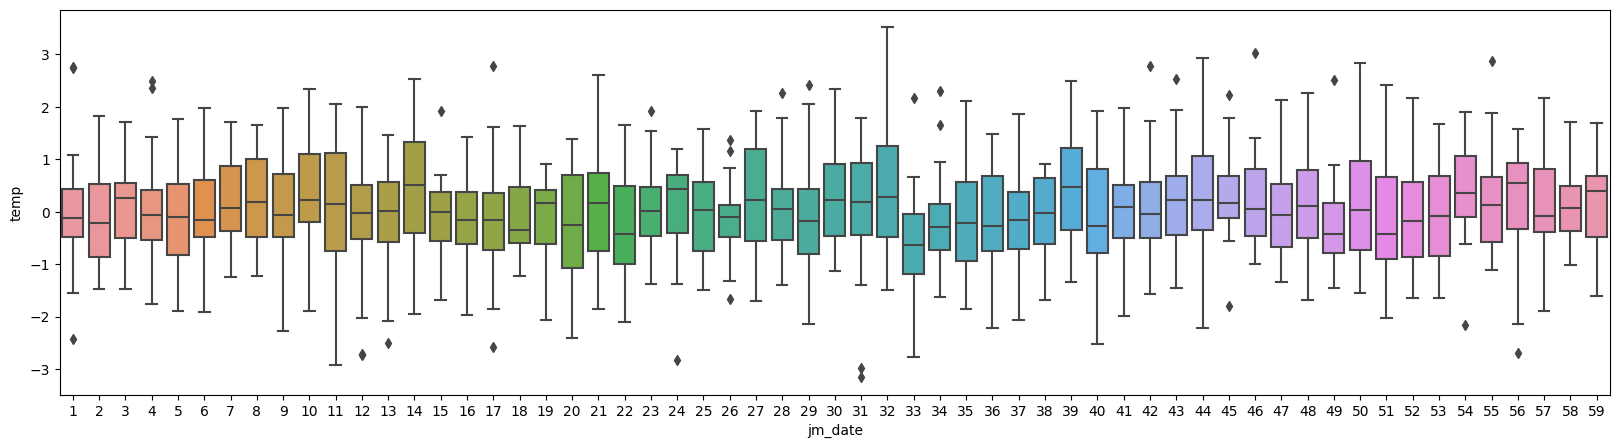

In [13]:
# trying to draw the same without index DatetimeIndex column ¿?=

fig, axe = plt.subplots(figsize= (20, 5))
sns.boxplot(x= df['jm_date'].dt.dayofyear, y=df['temp'], ax=axe)

### Plotting the Time Series Boxplot for Each Month

In [ ]:
df = pd.read_csv

### Plotting the Time Series Boxplot for Each Year